## Dự đoán đột quỵ (stroke) ở bệnh nhân 
Cho tập data gồm 2 file train.csv và test_set.csv. Mỗi mẫu trong bộ data bao gồm các thông tin sau của bệnh nhân: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg, glucose_level, bmi, smoking_status. Cột "stroke" trong file train.csv chứa nhãn cần phân loại: 0 (nếu bệnh nhân không bị stroke) hoặc 1 (nếu bệnh nhân bị stroke). Học viên hãy thực hiện các yêu cầu bên dưới.

#### 1. Load tập train, test và xử lý data nếu cần

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3576 non-null   int64  
 1   id                 3576 non-null   int64  
 2   gender             3576 non-null   object 
 3   age                3576 non-null   float64
 4   hypertension       3576 non-null   int64  
 5   heart_disease      3576 non-null   int64  
 6   ever_married       3576 non-null   object 
 7   work_type          3576 non-null   object 
 8   Residence_type     3576 non-null   object 
 9   avg_glucose_level  3576 non-null   float64
 10  bmi                3451 non-null   float64
 11  smoking_status     3576 non-null   object 
 12  stroke             3576 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 363.3+ KB


In [3]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1533 non-null   int64  
 1   id                 1533 non-null   int64  
 2   gender             1533 non-null   object 
 3   age                1533 non-null   float64
 4   hypertension       1533 non-null   int64  
 5   heart_disease      1533 non-null   int64  
 6   ever_married       1533 non-null   object 
 7   work_type          1533 non-null   object 
 8   Residence_type     1533 non-null   object 
 9   avg_glucose_level  1533 non-null   float64
 10  bmi                1457 non-null   float64
 11  smoking_status     1533 non-null   object 
 12  stroke             1533 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 155.8+ KB


In [4]:
uni = train[['ever_married','work_type','Residence_type','smoking_status']]
for col in uni.columns:
    unique = uni[col].unique()
    print(f'{uni[col].name:}',unique)

ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'children' 'Govt_job' 'Never_worked']
Residence_type ['Rural' 'Urban']
smoking_status ['Unknown' 'never smoked' 'formerly smoked' 'smokes']


In [5]:
train = train.drop(columns=['Unnamed: 0','id'])
test = test.drop(columns=['Unnamed: 0','id'])

In [6]:
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

In [7]:
numeric_features = ['age', 'hypertension', 'heart_disease','avg_glucose_level','bmi']
categorical_features = ['ever_married','work_type','Residence_type','smoking_status']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', preprocessing.StandardScaler()),
    ('minmaxscaler', preprocessing.MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('ohencoder', preprocessing.OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('numeric_transform', numeric_pipeline, numeric_features),
    ('categorical_transform', categorical_pipeline, categorical_features)
])

In [8]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:, :-1]
y_train = train.iloc[:, -1]
y_test = test.iloc[:, -1]

In [9]:
train_X = full_pipeline.fit_transform(X_train)
test_X = full_pipeline.fit_transform(X_test)

#### 2. Dựa vào tập train, tiến hành tìm ra mô hình tốt nhất cùng bộ thông số phù hợp trong các loại mô hình sau: SVM, kNN, Decision Tree, Random Forest và XGBoost, với cross validation = 5. Nhận xét các kết quả thu được, trực quan hóa dữ liệu và vẽ biểu đồ 

In [10]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

models = {
    'SVM': SVC(), 
    'kNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

params = {
    'SVM': {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01, 0.1, 1, 10]}, 
    'kNN': {'n_neighbors': [3,5,6,9,11], 'weights' : ['uniform','balanced']},
    'DT': {'criterion':['gini', 'Entropy'], 'class_weight':['balanced',None]},
    'RF': {'n_estimators': [50,200,300,400,500], 'class_weight':['balanced',None]},
    'XGBoost': {'n_estimators': [50,200,300,400,500], 'learning_rate': [0.01, 0.1, 0.2]}
}

In [11]:
from HyperclassifierSearch import HyperclassifierSearch
search = HyperclassifierSearch(models, params)
best_model = search.train_model(train_X, y_train, cv=5)

Search for SVM ...
Search for kNN ...


c:\program files\python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\program files\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\program files\python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\program files\python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\program files\python38\lib\site-pack

Search for DT ...


c:\program files\python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\program files\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\program files\python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\program files\python38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\program files\python38\lib\site-pack

Search for RF ...
Search for XGBoost ...
Search is done.


results round for: SVM
results round for: kNN
results round for: DT
results round for: RF
results round for: XGBoost


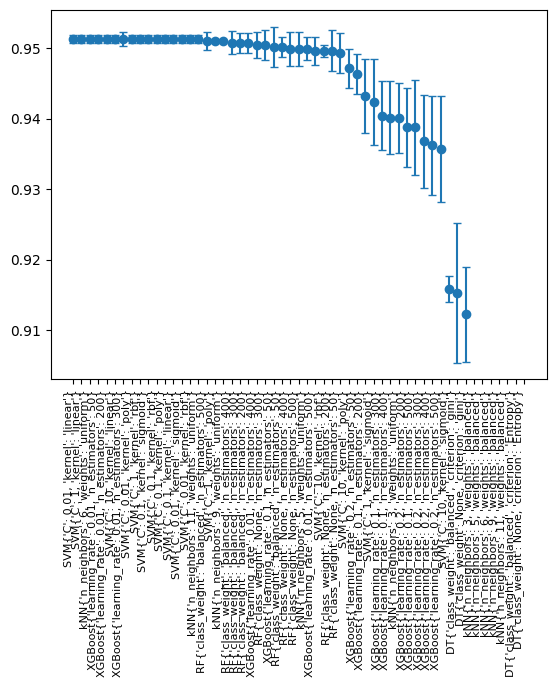

In [12]:
import matplotlib.pyplot as plt 
result = search.evaluate_model()
result['label'] = result['Estimator'].astype(str) + result['params'].astype(str)
std = result['std_test_score'].to_list()
mean_ = result['mean_test_score'].to_list()
x = result['label'].to_list()
plt.errorbar(x, mean_, std, linestyle='None', marker='o',capsize=3)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.show()

In [13]:
search.evaluate_model()

results round for: SVM
results round for: kNN
results round for: DT
results round for: RF
results round for: XGBoost


,Estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,SVM,"{'C': 0.01, 'kernel': 'linear'}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553
1,SVM,"{'C': 1, 'kernel': 'rbf'}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553
2,kNN,"{'n_neighbors': 11, 'weights': 'uniform'}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553
3,kNN,"{'n_neighbors': 6, 'weights': 'uniform'}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553
4,XGBoost,"{'learning_rate': 0.01, 'n_estimators': 50}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553
5,XGBoost,"{'learning_rate': 0.01, 'n_estimators': 200}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553
6,XGBoost,"{'learning_rate': 0.01, 'n_estimators': 300}",0.951117,0.952448,0.951049,0.952448,0.949650,0.951342,0.001043
7,SVM,"{'C': 0.01, 'kernel': 'poly'}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553
8,SVM,"{'C': 10, 'kernel': 'linear'}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553
9,SVM,"{'C': 1, 'kernel': 'linear'}",0.951117,0.952448,0.951049,0.951049,0.951049,0.951342,0.000553


##### Nhận xét: 
Dựa trên mean_test_score và std_test_score, ta có thể chọn các model sau để train như: SVM (C=0.01, kernel='linear'), SVM (C=1, kernel='rbf'), kNN (n_neighbors=11, weights='uniform'), kNN (n_neighbors=6, weights='uniform'), XGBoost (learning_rate=0.01, n_estimators=50), XGBoost (learning_rate=0.01, n_estimators=200). Vì tất cả đều có số điểm Mean test score cao nhất là 0.951342 và std test score thấp nhất là 0.000553.

#### 3. Chọn mô hình tốt nhất từ (1) để fit trên tập Train và dự đoán trên tập test. Nhận xét kết quả

In [13]:
from sklearn.metrics import classification_report as report

In [14]:
model = KNeighborsClassifier(n_neighbors=6, weights='uniform')
model.fit(train_X, y_train)
preds = model.predict(test_X)
rp = report(y_test, preds, digits=4)
print(rp)

              precision    recall  f1-score   support

           0     0.9517    0.9993    0.9749      1458
           1     0.5000    0.0133    0.0260        75

    accuracy                         0.9511      1533
   macro avg     0.7258    0.5063    0.5004      1533
weighted avg     0.9296    0.9511    0.9285      1533



##### Nhận xét:
- Lớp 0: Precision khá cao (0.9517) và Recall cũng cao (0.9993) chỉ ra mô hình có khả năng tìm ra hầu hết các trường hợp thực sự thuộc lớp 0 (bệnh nhân không bị đột quỵ). Đồng thời, F1-score khá cao (0.9749) cho thấy sự cân bằng giữa Precision và Recall
- Lớp 1: Precision thấp (0.5000) và Recall cũng rất thấp (0.0133) cho thấy tỷ lệ dự đoán đúng và tìm thấy trường hợp thực sự thuộc lớp 1 (bệnh nhân bị đột quỵ) không cao. Bên cạnh đó, F1-score của lớp 1 (0.0260) rất thấp, cho thấy mô hình không hoạt động tốt trên lớp này.
- Accuracy (0.9511) cao, nhưng do mất cân bằng giữa các lớp (lớp 0 có số lượng lớn hơn nhiều so với lớp 1), nên accuracy không phản ánh đúng hiệu suất của mô hình.

##### --> Tóm lại, mặc dù mô hình có độ chính xác cao (accuracy), nhưng hiệu suất trên lớp thiểu số (lớp 1) là không tốt - khả năng dự đoán bệnh nhân có nguy cơ bị đột quỵ không tốt. Mô hình bị mất cân bằng.

#### 4. Tìm cách cải thiện độ chính xác (accuracy) của model

In [16]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(train_X, y_train)
preds2 = lgb_model.predict(test_X)
rp2 = report(y_test, preds2, digits=4)
print(rp2)

[LightGBM] [Info] Number of positive: 174, number of negative: 3402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3576, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048658 -> initscore=-2.973063
[LightGBM] [Info] Start training from score -2.973063
              precision    recall  f1-score   support

           0     0.9522    0.9979    0.9745      1458
           1     0.4000    0.0267    0.0500        75

    accuracy                         0.9504      1533
   macro avg     0.6761    0.5123    0.5123      1533
weighted avg     0.9252    0.9504    0.9293      1533



Với model được training với LightGBM có: 

- Đối với lớp 0 - bệnh nhân không bị đột quỵ : Precision (0.9522) và Recall (0.9979) đều cao, F1-score (0.9745) cũng cao, cho thấy mô hình có khả năng dự đoán và nhận diện bệnh nhân không bị đột quỵ.- 
Đối với lớp 1: Precision (0.4000) và Recall (0.0267) thấp, F1-score (0.0500) cũng thấp, cho thấy mô hình vẫn gặp khó khăn trong việc dự đoánbệnh nhân có nguy cơ bị đột quỵ.

So với model trước với phương pháp kNN: 

- Model mới có kết quả tương tự với model trước đối với lớp 0 - bệnh nhân không bị đột quỵ với một số cải thiện nhỏ về Precision và Recall.- 
Tuy nhiên, đối với lớp 1, model mới có Precision cao hơn nhưng Recall thấp hơn so với model trước, dẫn đến F1-score cũng thấp hơn.

Tóm lại: 

- Model mới có accuracy (0.9504) không có sự cải thiện đáng kể so với model trước (0.9511).- 
Mô hình vẫn gặp khó khăn trong việc dự đoán lớp thiểu số (lớp 1..

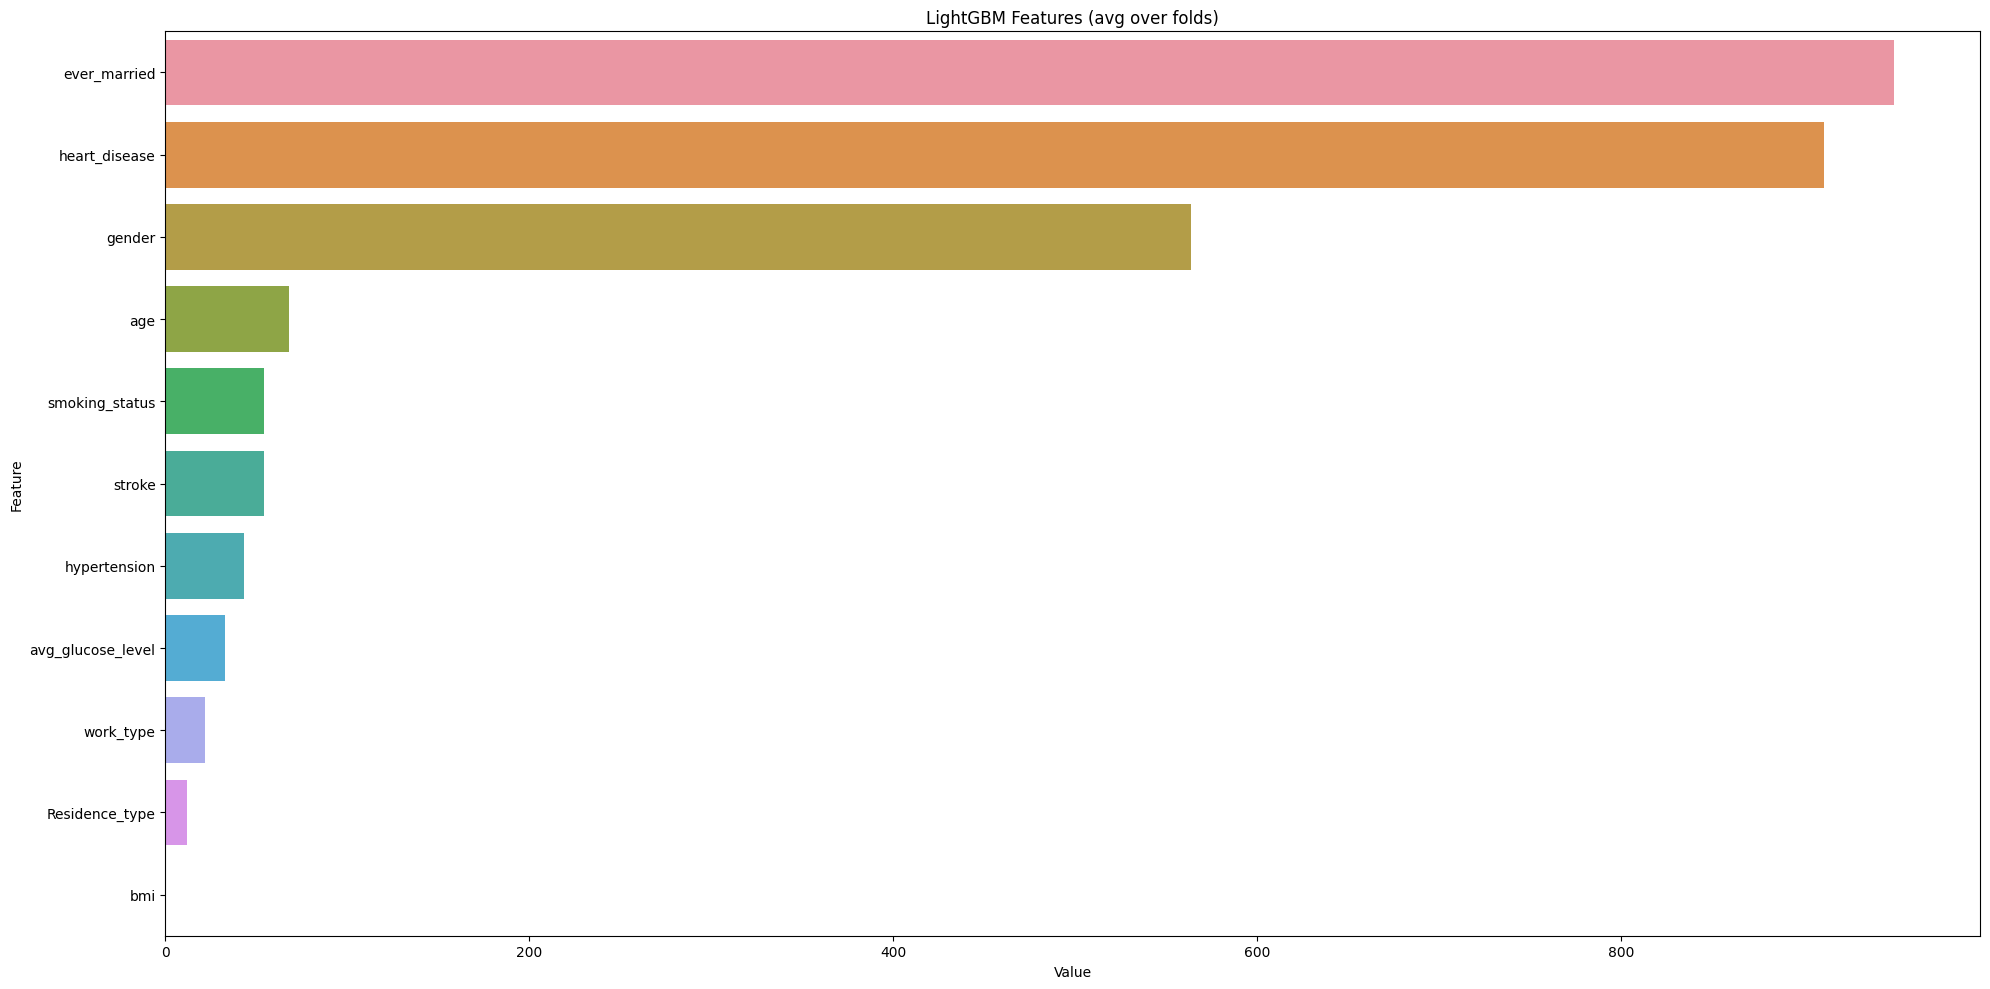

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(lgb_model.feature_importances_,train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')